# Sistema de agrupación de casas
Queremos ser capaces de clasificar casas según la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
# Métricas
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from scipy.stats import randint
# To save models
import json
import pickle

import warnings
warnings.filterwarnings('ignore')

In [18]:
df_ini = pd.read_csv('../data/raw/09 housing.csv', sep=',')
df_ini.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [20]:
# Eliminamos las columnas con las que no hay que trabajar.
columns_drop = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
                
df_ini.drop(columns_drop, axis=1, inplace=True)

df_ini.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [21]:
# Elimino duplicados de las columnas restantes.

df= df_ini.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20635 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20635 non-null  float64
 1   Latitude   20635 non-null  float64
 2   Longitude  20635 non-null  float64
dtypes: float64(3)
memory usage: 644.8 KB


> #### Observación:
> Al eliminar duplicados me quedo con 20635 entradas cuando teniamos 20640.

Text(0.5, 0, 'MedInc')

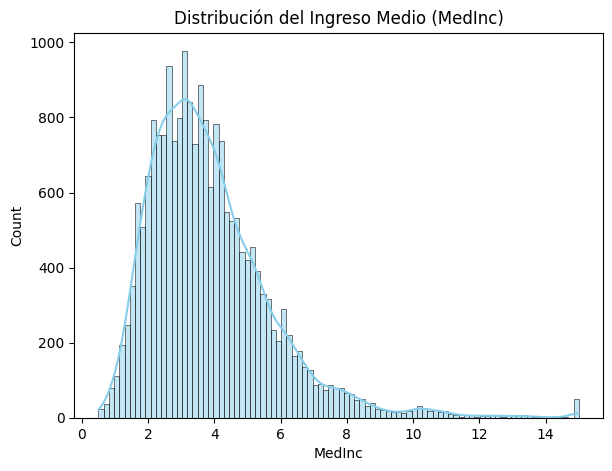

In [25]:
# Visualización de la distribución de las variables numéricas.
plt.figure(figsize=(15, 5))

# Histograma de Ingreso Medio (MedInc)
plt.subplot(1, 2, 1)
sns.histplot(df_ini['MedInc'], bins='auto', kde=True, color='skyblue')
plt.title('Distribución del Ingreso Medio (MedInc)')
plt.xlabel('MedInc')


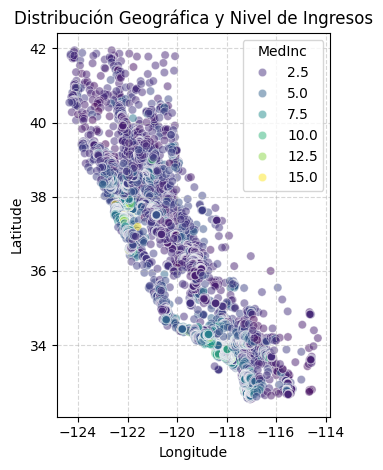

In [23]:
# Gráfico geográfico (Latitud vs Longitud)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ini, x='Longitude', y='Latitude', hue='MedInc', palette='viridis', alpha=0.5)
plt.title('Distribución Geográfica y Nivel de Ingresos')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [24]:
# Guardo este df para usarlo en el siguiente notebook.

df_ini = pd.DataFrame(df)
df_ini.to_csv('../data/processed/df_ini_09housing.csv', index=False)